# Etudes des valeurs foncières Française
Liens: https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import glob
from datetime import datetime

pd.options.display.max_columns = None

## Chargement du fichiers des valeurs foncières

In [2]:
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y') # 03/01/2018
def_types = {#'Code postal': 'category',
             #'B/T/Q': 'category',
             #'Nature mutation': 'category',
             #'Type de voie': 'category',
             #'Voie': 'category',
             #'Commune': 'category',
             #'Code departement': 'category',
             #'Type local': 'category',
             #'Nature culture': 'category',
             #'Nature culture speciale': 'category',
             
             'No voie': 'Int64',
             'Surface Carrez du 1er lot':'Float16',
             'Surface Carrez du 2eme lot':'Float16',
             'Surface Carrez du 3eme lot':'Float16',
             'Surface Carrez du 4eme lot':'Float16',
             'Surface Carrez du 5eme lot':'Float16',
             'Nombre de lots':'Int16',
             'Nombre de lots':'Int16',
             'Surface reelle bati': 'Float32',
             'Nombre pieces principales': 'Int8',
             'Surface terrain':'Float32'
            }
col_exclude = ['Code service CH', 'Reference document', '1 Articles CGI',
               '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI', 'Identifiant local',
               'Prefixe de section', 'Section', 'No plan',
               'No Volume','No disposition','Code type local', 'Code voie', 
               '5eme lot', '4eme lot', '3eme lot', '2eme lot', '1er lot']
all_files = glob.glob("data/*.txt")
df = pd.concat((pd.read_csv(f, sep='|', decimal=",", dtype=def_types, parse_dates=['Date mutation'], date_parser=dateparse, usecols=lambda col: col not in col_exclude) for f in all_files))
#df = pd.read_csv('data/valeursfoncieres-2019.txt', sep='|', decimal=",", dtype=def_types, parse_dates=['Date mutation'], date_parser=dateparse,usecols=lambda col: col not in col_exclude)

/Users/odyssee/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:31: DtypeWarning: Columns (18,41) have mixed types.Specify dtype option on import or set low_memory=False.


#### Renomme les colonnes

In [3]:
import unidecode

columns = {}
for index, column_name in enumerate(df.columns):
    columns[column_name] = unidecode.unidecode(column_name.replace(' ','_').replace('\'','_').lower())
df.rename(columns=columns, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13141029 entries, 0 to 3059536
Data columns (total 23 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   date_mutation               datetime64[ns]
 1   nature_mutation             object        
 2   valeur_fonciere             float64       
 3   no_voie                     Int64         
 4   b/t/q                       object        
 5   type_de_voie                object        
 6   voie                        object        
 7   code_postal                 float64       
 8   commune                     object        
 9   code_departement            object        
 10  code_commune                int64         
 11  surface_carrez_du_1er_lot   float16       
 12  surface_carrez_du_2eme_lot  float16       
 13  surface_carrez_du_3eme_lot  float16       
 14  surface_carrez_du_4eme_lot  float16       
 15  surface_carrez_du_5eme_lot  float16       
 16  nombre_de_lots   

## Supression des colonnes sans données

On gardes les colonnes sans valeurs foncières car elles peuvent liées à d'autre transaction

In [5]:
# Suppression des lignes où il n'y a pas de 'valeurs foncières'
#indexNames = df[df['valeur_fonciere'].isnull()].index
#df.drop(indexNames, inplace=True)

## Recherche des doublons

In [6]:
#df[df.duplicated(keep=False)]

In [7]:
# Drop duplicates
initial_length = len(df)
df.drop_duplicates(inplace=True)
print("Suppression des doublons: {}".format(initial_length-len(df)))

Suppression des doublons: 1246426


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11894603 entries, 0 to 3059536
Data columns (total 23 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   date_mutation               datetime64[ns]
 1   nature_mutation             object        
 2   valeur_fonciere             float64       
 3   no_voie                     Int64         
 4   b/t/q                       object        
 5   type_de_voie                object        
 6   voie                        object        
 7   code_postal                 float64       
 8   commune                     object        
 9   code_departement            object        
 10  code_commune                int64         
 11  surface_carrez_du_1er_lot   float16       
 12  surface_carrez_du_2eme_lot  float16       
 13  surface_carrez_du_3eme_lot  float16       
 14  surface_carrez_du_4eme_lot  float16       
 15  surface_carrez_du_5eme_lot  float16       
 16  nombre_de_lots   

## Nettoyage des données simple

In [9]:
def missing_values_assessment(df):
    nan_values = df.isnull().sum().sum()
    print('Nombre d\'observations: {:,}'.format(len(df.index)))
    print('Nombre de valeurs: {:,}'.format(df.size))
    print('Valeurs manquantes: {:,}'.format(nan_values))
    print('Qualité des données: {}%'.format(100-round((nan_values/df.size)*100,2)))
    print('Type de données:\n {}%'.format(df.dtypes.value_counts()))
    analysis = {'Manquant': df.isnull().sum(),
                'Manquant %':round((df.isnull().sum()/len(df))*100, 2),
                'Type':df.dtypes
               }
    return pd.DataFrame(analysis)

#### Analyse des données manquantes

In [10]:
missing_values_assessment(df).sort_values('Manquant %', ascending=False)

Nombre d'observations: 11,894,603
Nombre de valeurs: 273,575,869
Valeurs manquantes: 115,333,144
Qualité des données: 57.84%
Type de données:
 object            9
float16           5
float64           2
float32           2
Int8              1
int64             1
Int16             1
Int64             1
datetime64[ns]    1
dtype: int64%


,Manquant,Manquant %,Type
surface_carrez_du_5eme_lot,11891817,99.98,float16
surface_carrez_du_4eme_lot,11887882,99.94,float16
surface_carrez_du_3eme_lot,11868287,99.78,float16
surface_carrez_du_2eme_lot,11624402,97.73,float16
b/t/q,11407262,95.90,object
nature_culture_speciale,11315522,95.13,object
surface_carrez_du_1er_lot,10815720,90.93,float16
nombre_pieces_principales,5632626,47.35,Int8
surface_reelle_bati,5632626,47.35,float32
type_local,5622829,47.27,object


In [11]:
# Remplissage des mètres Carrez manquant avec zéro
#df = df[df['Nombre de lots']<=5].dropna(how='all', axis=1)
df['surface_carrez_du_5eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_4eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_3eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_2eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_1er_lot'].fillna(0, inplace=True)
df['surface_reelle_bati'].fillna(0, inplace=True)
df['surface_terrain'].fillna(0, inplace=True)
df['nombre_pieces_principales'].fillna(0, inplace=True)

#### Analyse graphique des données manquantes

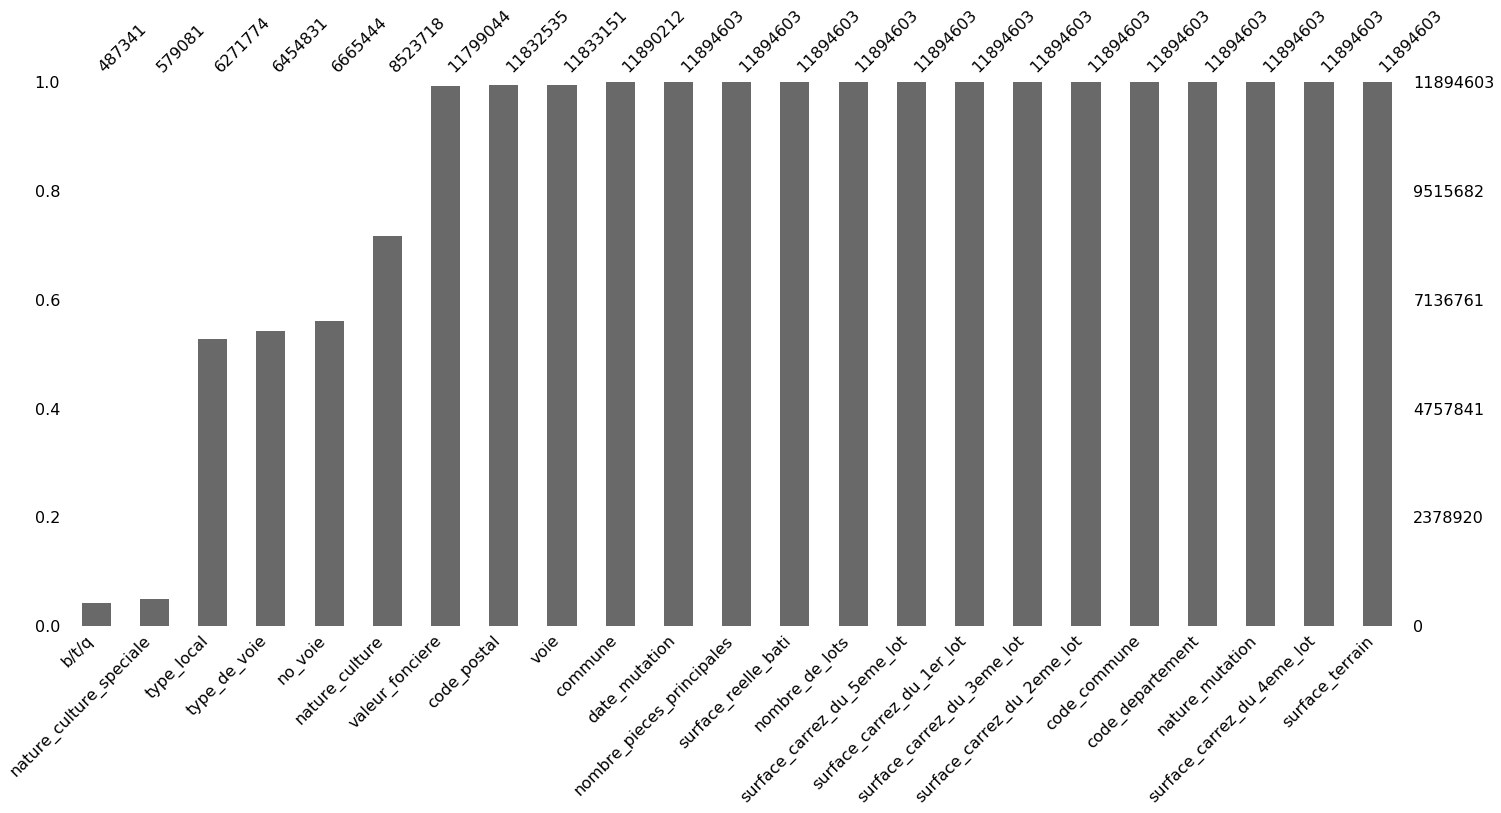

In [12]:
msno.bar(df, sort='ascending')

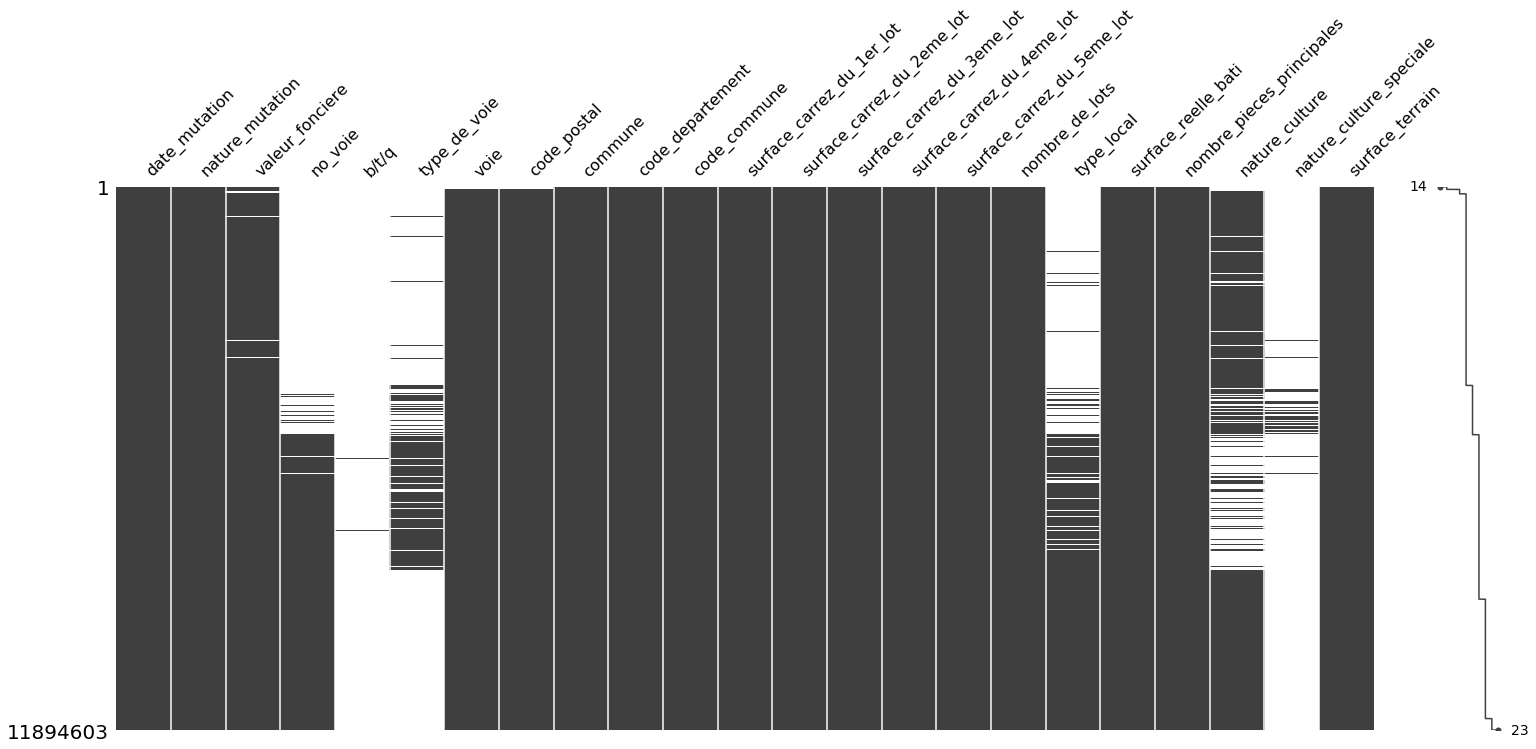

In [13]:
msno.matrix(df, sort='ascending')

## Nettoyage de données fonctionnelles

In [14]:
# Colonne 'B/T/Q'
df.loc[df['b/t/q'].isin([',','/','*',"'",'-','.']), ['b/t/q']] = np.NaN

In [15]:
# Colonne Code Département
df['code_departement'] = df['code_departement'].astype('str')
df.loc[df['code_departement']=='2A', ['code_departement']] = '120'
df.loc[df['code_departement']=='2B', ['code_departement']] = '121'
df['code_departement'] = df['code_departement'].astype(np.int16) # Converti en int16 pour la mémoire

In [16]:
# Colonne code commune
df['code_commune'] = df['code_commune'].astype(np.int16)

In [17]:
## Formatage du code postal
df.code_postal=df.code_postal.apply(lambda x: '0{}'.format(x) if len(str(x))==4 else x)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11894603 entries, 0 to 3059536
Data columns (total 23 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   date_mutation               datetime64[ns]
 1   nature_mutation             object        
 2   valeur_fonciere             float64       
 3   no_voie                     Int64         
 4   b/t/q                       object        
 5   type_de_voie                object        
 6   voie                        object        
 7   code_postal                 float64       
 8   commune                     object        
 9   code_departement            int16         
 10  code_commune                int16         
 11  surface_carrez_du_1er_lot   float16       
 12  surface_carrez_du_2eme_lot  float16       
 13  surface_carrez_du_3eme_lot  float16       
 14  surface_carrez_du_4eme_lot  float16       
 15  surface_carrez_du_5eme_lot  float16       
 16  nombre_de_lots   

In [19]:
missing_values_assessment(df).sort_values('Manquant %', ascending=False)

Nombre d'observations: 11,894,603
Nombre de valeurs: 273,575,869
Valeurs manquantes: 42,609,165
Qualité des données: 84.43%
Type de données:
 object            8
float16           5
float64           2
float32           2
int16             2
Int16             1
Int8              1
Int64             1
datetime64[ns]    1
dtype: int64%


,Manquant,Manquant %,Type
b/t/q,11407528,95.91,object
nature_culture_speciale,11315522,95.13,object
type_local,5622829,47.27,object
type_de_voie,5439772,45.73,object
no_voie,5229159,43.96,Int64
nature_culture,3370885,28.34,object
valeur_fonciere,95559,0.80,float64
voie,61452,0.52,object
code_postal,62068,0.52,float64
commune,4391,0.04,object


## Sauvegarde des données finales

In [20]:
df.to_csv(r'data/valeursfoncieres-clean-df.csv', index = None, header=True)

## Extraction des données pour une analyse ciblée

In [21]:
df_maisons = df[(df['type_local'].isin(['Maison','Appartement']))&(df['nature_mutation']=='Vente')]
len(df_maisons.index)

4366427

In [22]:
df_maisons_simple = df_maisons.groupby(['date_mutation','valeur_fonciere']).filter(lambda x: len(x) == 1)
len(df_maisons_simple.index)

813762

In [23]:
df_maisons_simple['surface_carrez'] = df_maisons_simple['surface_carrez_du_1er_lot']+ df_maisons_simple['surface_carrez_du_2eme_lot'] + df_maisons_simple['surface_carrez_du_3eme_lot'] + df_maisons_simple['surface_carrez_du_4eme_lot'] + df_maisons_simple['surface_carrez_du_5eme_lot']
#df_maisons_simple['surface_carrez'].apply(lambda x: x if x>0 else df_maisons_simple['surface_reelle_bati'])


In [24]:
df_maisons_simple['surface_carrez'] = np.where(df_maisons_simple['surface_carrez']==0,df_maisons_simple['surface_reelle_bati'],df_maisons_simple['surface_carrez'])

In [25]:
df_maisons_simple['prix_m2'] = df_maisons_simple['valeur_fonciere']/df_maisons_simple['surface_carrez']

In [26]:
df_maisons_simple.sort_values(by=['prix_m2']).tail(10)

,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,voie,code_postal,commune,code_departement,code_commune,surface_carrez_du_1er_lot,surface_carrez_du_2eme_lot,surface_carrez_du_3eme_lot,surface_carrez_du_4eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,surface_carrez,prix_m2
122631,2015-03-26,Vente,6.418550e+08,69,NaN,AV,DU ROI ALBERT,6400.0,CANNES,6,29,0.0,75.4375,0.0,0.0,0.0,2,Appartement,72.0,2,NaN,NaN,0.0,75.4375,8.508434e+06
2484292,2018-02-10,Vente,3.500000e+04,9,NaN,RUE,SAINTE CATHERINE,82200.0,MOISSAC,82,112,0.0,0.0000,0.0,0.0,0.0,1,Appartement,0.0,0,NaN,NaN,0.0,0.0000,inf
156111,2015-04-28,Vente,3.103580e+04,1180,NaN,AV,DE BEAUCAIRE,7500.0,GUILHERAND-GRANGES,7,102,0.0,0.0000,0.0,0.0,0.0,0,Maison,0.0,0,S,NaN,176.0,0.0000,inf
316784,2017-07-04,Vente,4.305000e+05,17,NaN,RUE,ERNEST RENAN,13005.0,MARSEILLE 5EME,13,205,0.0,0.0000,0.0,0.0,0.0,1,Appartement,0.0,0,NaN,NaN,0.0,0.0000,inf
1546984,2015-06-26,Vente,3.970000e+05,5,NaN,ALL,DES SAULES,59130.0,LAMBERSART,59,328,0.0,0.0000,0.0,0.0,0.0,0,Maison,0.0,0,S,NaN,766.0,0.0000,inf
2060338,2015-10-20,Vente,2.191000e+05,1,NaN,RUE,BENOIT MALON,76300.0,SOTTEVILLE-LES-ROUEN,76,681,0.0,0.0000,0.0,0.0,0.0,0,Maison,0.0,0,S,NaN,271.0,0.0000,inf
1438147,2015-11-13,Vente,1.515843e+05,21,NaN,RUE,SERAPHINE DE SENLIS,53000.0,LAVAL,53,130,0.0,0.0000,0.0,0.0,0.0,0,Maison,0.0,0,AB,NaN,368.0,0.0000,inf
3248931,2017-11-15,Vente,1.307328e+05,6,NaN,BD,DE L HAUTIL,95000.0,CERGY,95,127,0.0,0.0000,0.0,0.0,0.0,1,Appartement,0.0,0,NaN,NaN,0.0,0.0000,inf
2888327,2017-04-03,Vente,1.150000e+04,36,C,RUE,SAINT AMAND,85350.0,ILE-D'YEU (L'),85,113,0.0,0.0000,0.0,0.0,0.0,0,Maison,0.0,0,S,NaN,118.0,0.0000,inf
271532,2015-01-29,Vente,2.080418e+05,314,NaN,CHE,DES MILLE ECUS,13190.0,ALLAUCH,13,2,0.0,0.0000,0.0,0.0,0.0,1,Appartement,0.0,0,NaN,NaN,0.0,0.0000,inf


In [27]:
len(df_maisons_simple.index)

813762

In [28]:
df_maisons_simple[df_maisons_simple['surface_carrez']==0]

,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,voie,code_postal,commune,code_departement,code_commune,surface_carrez_du_1er_lot,surface_carrez_du_2eme_lot,surface_carrez_du_3eme_lot,surface_carrez_du_4eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,surface_carrez,prix_m2
156111,2015-04-28,Vente,31035.80,1180,NaN,AV,DE BEAUCAIRE,7500.0,GUILHERAND-GRANGES,7,102,0.0,0.0,0.0,0.0,0.0,0,Maison,0.0,0,S,NaN,176.0,0.0,inf
271532,2015-01-29,Vente,208041.78,314,NaN,CHE,DES MILLE ECUS,13190.0,ALLAUCH,13,2,0.0,0.0,0.0,0.0,0.0,1,Appartement,0.0,0,NaN,NaN,0.0,0.0,inf
1438147,2015-11-13,Vente,151584.27,21,NaN,RUE,SERAPHINE DE SENLIS,53000.0,LAVAL,53,130,0.0,0.0,0.0,0.0,0.0,0,Maison,0.0,0,AB,NaN,368.0,0.0,inf
1546984,2015-06-26,Vente,397000.00,5,NaN,ALL,DES SAULES,59130.0,LAMBERSART,59,328,0.0,0.0,0.0,0.0,0.0,0,Maison,0.0,0,S,NaN,766.0,0.0,inf
2060338,2015-10-20,Vente,219100.00,1,NaN,RUE,BENOIT MALON,76300.0,SOTTEVILLE-LES-ROUEN,76,681,0.0,0.0,0.0,0.0,0.0,0,Maison,0.0,0,S,NaN,271.0,0.0,inf
316784,2017-07-04,Vente,430500.00,17,NaN,RUE,ERNEST RENAN,13005.0,MARSEILLE 5EME,13,205,0.0,0.0,0.0,0.0,0.0,1,Appartement,0.0,0,NaN,NaN,0.0,0.0,inf
2888327,2017-04-03,Vente,11500.00,36,C,RUE,SAINT AMAND,85350.0,ILE-D'YEU (L'),85,113,0.0,0.0,0.0,0.0,0.0,0,Maison,0.0,0,S,NaN,118.0,0.0,inf
3248931,2017-11-15,Vente,130732.80,6,NaN,BD,DE L HAUTIL,95000.0,CERGY,95,127,0.0,0.0,0.0,0.0,0.0,1,Appartement,0.0,0,NaN,NaN,0.0,0.0,inf
2484292,2018-02-10,Vente,35000.00,9,NaN,RUE,SAINTE CATHERINE,82200.0,MOISSAC,82,112,0.0,0.0,0.0,0.0,0.0,1,Appartement,0.0,0,NaN,NaN,0.0,0.0,inf


In [29]:
len(df_maisons_simple[df_maisons_simple['surface_carrez']==0].index)

9

In [30]:
df_maisons_simple = df_maisons_simple.drop(df_maisons_simple[df_maisons_simple['surface_carrez']==0].index)

In [31]:
pd.options.display.float_format = "{:.2f}".format
df_maisons_simple['prix_m2'].describe()

count    813751.00
mean       3552.24
std       18668.89
min           0.00
25%        1644.15
50%        2547.56
75%        4007.32
max     8508434.13
Name: prix_m2, dtype: float64

In [32]:
quant_low = df_maisons_simple['prix_m2'].quantile(0.04)
quant_high = df_maisons_simple['prix_m2'].quantile(0.99)
qty_low = len(df_maisons_simple[df_maisons_simple['prix_m2']<quant_low].index)
qty_high = len(df_maisons_simple[df_maisons_simple['prix_m2']>quant_high].index)
print('{}({}) < mean < {}({})'.format(quant_low, qty_low, quant_high, qty_high))


536.5853658536586(32547) < mean < 13606.336536257888(8138)


In [33]:
df_maisons_simple = df_maisons_simple.drop(df_maisons_simple[df_maisons_simple['prix_m2']<quant_low].index)
df_maisons_simple = df_maisons_simple.drop(df_maisons_simple[df_maisons_simple['prix_m2']>quant_high].index)

In [34]:
len(df_maisons_simple.index)

766098

In [35]:
df_maisons_simple.sort_values(by=['prix_m2']).tail(10)

,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,voie,code_postal,commune,code_departement,code_commune,surface_carrez_du_1er_lot,surface_carrez_du_2eme_lot,surface_carrez_du_3eme_lot,surface_carrez_du_4eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,surface_carrez,prix_m2
3040548,2018-10-15,Vente,1355000.00,12,NaN,RUE,SAUSSIER LEROY,75017.00,PARIS 17,75,117,99.62,0.00,0.00,0.00,0.00,2,Appartement,105.00,4,NaN,NaN,0.00,99.62,13601.00
2997669,2018-01-12,Vente,1100000.00,5,NaN,BD,DES FILLES DU CALVAIRE,75003.00,PARIS 03,75,103,80.88,0.00,0.00,0.00,0.00,1,Appartement,87.00,3,NaN,NaN,0.00,80.88,13601.24
2915318,2016-09-02,Vente,6080000.00,110,NaN,RUE,DE LA FAISANDERIE,75016.00,PARIS 16,75,116,0.00,0.00,0.00,0.00,0.00,7,Appartement,447.00,11,NaN,NaN,0.00,447.00,13601.79
2884188,2016-04-20,Vente,953000.00,78,NaN,BD,DE LA TOUR MAUBOURG,75007.00,PARIS 07,75,107,70.06,0.00,0.00,0.00,0.00,3,Appartement,70.00,2,NaN,NaN,0.00,70.06,13602.14
919411,2019-03-21,Vente,1633980.00,45,NaN,RUE,DE CHEZY,92200.00,NEUILLY-SUR-SEINE,92,51,120.12,0.00,0.00,0.00,0.00,2,Appartement,124.00,4,NaN,NaN,0.00,120.12,13602.33
3031280,2018-03-30,Vente,1584000.00,10,NaN,RUE,LEROUX,75016.00,PARIS 16,75,116,0.00,116.44,0.00,0.00,0.00,2,Appartement,108.00,4,NaN,NaN,0.00,116.44,13603.86
2909602,2016-09-15,Vente,764425.00,10,NaN,RUE,CESAR FRANCK,75015.00,PARIS 15,75,115,0.00,56.19,0.00,0.00,0.00,2,Appartement,59.00,2,NaN,NaN,0.00,56.19,13604.89
3035991,2018-12-10,Vente,1750000.00,1,NaN,PL,PIERRE BRISSON,75016.00,PARIS 16,75,116,128.62,0.00,0.00,0.00,0.00,1,Appartement,134.00,5,NaN,NaN,0.00,128.62,13605.44
2456186,2017-08-07,Vente,2000000.00,20,NaN,RTE,DE HAUTEVILLE,74100.00,VETRAZ-MONTHOUX,74,298,0.00,0.00,0.00,0.00,0.00,0,Maison,147.00,4,NaN,NaN,0.00,147.00,13605.44
2885130,2016-06-20,Vente,1500000.00,34,NaN,RUE,GUYNEMER,75006.00,PARIS 06,75,106,0.00,110.25,0.00,0.00,0.00,2,Appartement,114.00,3,NaN,NaN,0.00,110.25,13605.44


In [36]:
df_maisons_simple['year'] = pd.DatetimeIndex(df_maisons_simple['date_mutation']).year
df_maisons_simple['month'] = pd.DatetimeIndex(df_maisons_simple['date_mutation']).month

In [37]:
df_maisons_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766098 entries, 20 to 3059534
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date_mutation               766098 non-null  datetime64[ns]
 1   nature_mutation             766098 non-null  object        
 2   valeur_fonciere             766098 non-null  float64       
 3   no_voie                     760316 non-null  Int64         
 4   b/t/q                       51907 non-null   object        
 5   type_de_voie                707571 non-null  object        
 6   voie                        765753 non-null  object        
 7   code_postal                 765694 non-null  float64       
 8   commune                     765758 non-null  object        
 9   code_departement            766098 non-null  int16         
 10  code_commune                766098 non-null  int16         
 11  surface_carrez_du_1er_lot   766098 no

In [38]:
df_maisons_simple.head()

,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,voie,code_postal,commune,code_departement,code_commune,surface_carrez_du_1er_lot,surface_carrez_du_2eme_lot,surface_carrez_du_3eme_lot,surface_carrez_du_4eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,surface_carrez,prix_m2,year,month
20,2015-01-08,Vente,559500.00,5376,NaN,NaN,SOUS ROCHE,1160.00,NEUVILLE-SUR-AIN,1,273,0.00,0.00,0.00,0.00,0.00,0,Maison,195.00,7,NaN,NaN,0.00,195.00,2869.23,2015,1
25,2015-01-12,Vente,170695.00,150,NaN,ALL,DU REVERMONT,1960.00,PERONNAS,1,289,0.00,0.00,0.00,0.00,0.00,0,Maison,93.00,4,S,NaN,1185.00,93.00,1835.43,2015,1
40,2015-01-07,Vente,231500.00,44,NaN,ALL,DES GLAIEULS,1290.00,CROTTET,1,134,0.00,0.00,0.00,0.00,0.00,0,Maison,161.00,6,S,NaN,1051.00,161.00,1437.89,2015,1
48,2015-01-14,Vente,224000.00,5144,NaN,NaN,CHEVIGNAT,1370.00,COURMANGOUX,1,127,0.00,0.00,0.00,0.00,0.00,0,Maison,149.00,4,S,NaN,940.00,149.00,1503.36,2015,1
52,2015-01-09,Vente,172780.00,5135,NaN,NaN,LES CHENEVIERES,1270.00,VERJON,1,432,0.00,0.00,0.00,0.00,0.00,0,Maison,113.00,5,S,NaN,1120.00,113.00,1529.03,2015,1


In [39]:
df_maisons_simple.drop(['date_mutation','nature_mutation','no_voie','b/t/q','type_de_voie','voie','code_commune',
        'surface_carrez_du_1er_lot','surface_carrez_du_2eme_lot','surface_carrez_du_3eme_lot',
        'surface_carrez_du_4eme_lot','surface_carrez_du_5eme_lot','nombre_de_lots','nature_culture',
        'nature_culture_speciale','surface_carrez','prix_m2'], axis=1, inplace=True)

In [40]:
df_maisons_simple = df_maisons_simple.dropna(axis = 0, how ='any')
missing_values_assessment(df_maisons_simple).sort_values('Manquant %', ascending=False)

Nombre d'observations: 765,694
Nombre de valeurs: 7,656,940
Valeurs manquantes: 0
Qualité des données: 100.0%
Type de données:
 object     2
int64      2
float64    2
float32    2
int16      1
Int8       1
dtype: int64%


,Manquant,Manquant %,Type
valeur_fonciere,0,0.00,float64
code_postal,0,0.00,float64
commune,0,0.00,object
code_departement,0,0.00,int16
type_local,0,0.00,object
surface_reelle_bati,0,0.00,float32
nombre_pieces_principales,0,0.00,Int8
surface_terrain,0,0.00,float32
year,0,0.00,int64
month,0,0.00,int64


In [41]:
df_maisons_simple.to_csv(r'data/biens_2015-19.csv', index = None, header=True)